In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.shape

(6362620, 11)

In [5]:
# Data Cleaning

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.duplicated().sum()

0

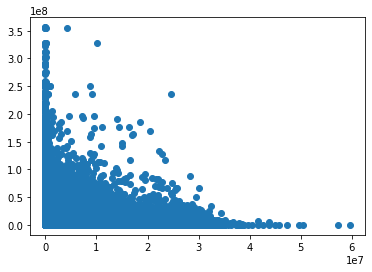

In [8]:
plt.scatter(df.oldbalanceOrg,df.newbalanceDest)
plt.show()

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

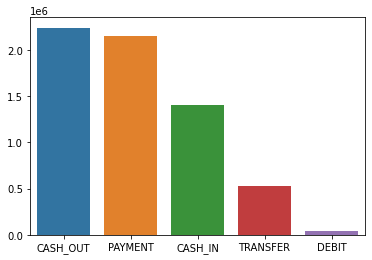

In [11]:
sns.barplot(x = df.type.value_counts().index, y = df.type.value_counts().values)
plt.show()

In [12]:
#it looks like that cash out takes the most of the data and then payment so we can conclude that the most of fraud will be in this two types

In [13]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


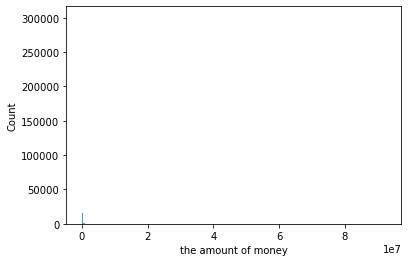

In [14]:
sns.histplot(df.amount)
plt.xlabel('the amount of money')
plt.show()

In [15]:
df.nlargest(10,"amount")
# top 10 largest transaction

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9.595980e+03,9.245511e+07,0,0
4060598,300,TRANSFER,73823490.36,C2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0,0
4146397,303,TRANSFER,71172480.42,C2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0,0
3946920,286,TRANSFER,69886731.30,C1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0,0
3911956,284,TRANSFER,69337316.27,C1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0,0
3937152,286,TRANSFER,67500761.29,C811810230,0.0,0.0,C1757599079,8.635615e+07,1.538569e+08,0,0
4105338,302,TRANSFER,66761272.21,C420748282,0.0,0.0,C1073241084,6.874206e+07,1.355033e+08,0,0
3892529,284,TRANSFER,64234448.19,C1139847449,0.0,0.0,C65111466,6.597691e+07,1.663021e+08,0,0
3991638,298,TRANSFER,63847992.58,C300140823,0.0,0.0,C514940761,7.217149e+07,1.360195e+08,0,0
4143801,303,TRANSFER,63294839.63,C372535854,0.0,0.0,C1871605747,7.512528e+07,1.384201e+08,0,0


In [16]:
df.nlargest(10,"amount").type

3686583    TRANSFER
4060598    TRANSFER
4146397    TRANSFER
3946920    TRANSFER
3911956    TRANSFER
3937152    TRANSFER
4105338    TRANSFER
3892529    TRANSFER
3991638    TRANSFER
4143801    TRANSFER
Name: type, dtype: object

In [17]:
df.nlargest(10, 'amount').isFraud

3686583    0
4060598    0
4146397    0
3946920    0
3911956    0
3937152    0
4105338    0
3892529    0
3991638    0
4143801    0
Name: isFraud, dtype: int64

In [18]:
# top 10 lagest transaction has no fraud and are mostly safed

In [19]:
df.nlargest(100, 'amount').isFraud.value_counts()

0    100
Name: isFraud, dtype: int64

In [20]:
# top 100 transaction is safe and we can conclude that for the largest amount of money the transaction nearly has more security than small amounts of money

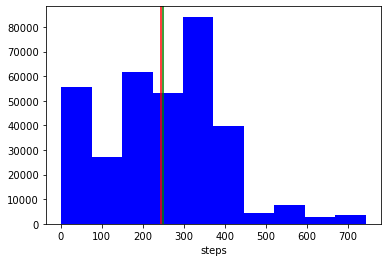

In [21]:
step_amount_avg = df[df.amount >= 500000]['step']
plt.hist(step_amount_avg, color = 'blue')
plt.axvline(step_amount_avg.mean(), color = 'red')
plt.axvline(step_amount_avg.median(), color = 'green')
plt.xlabel('steps')
plt.show()

In [22]:
df.nameOrig = df.nameOrig.str.replace('C','').astype('int')
df.rename(columns = {'nameOrig': 'client_id'}, inplace = True)

In [23]:
df.client_id.duplicated().value_counts()

False    6353307
True        9313
Name: client_id, dtype: int64

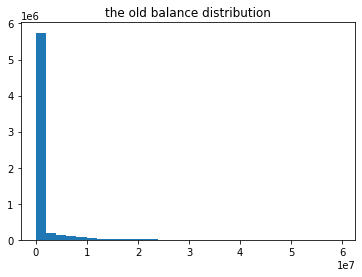

In [24]:
plt.hist(df.oldbalanceOrg, bins = 30)
plt.title('the old balance distribution')
plt.show()

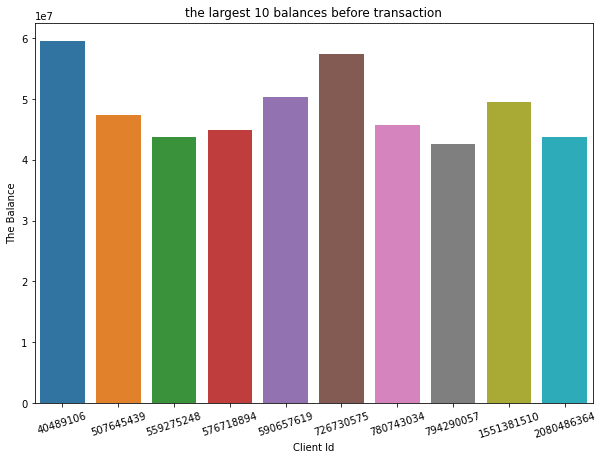

In [25]:
plt.figure(figsize = [10,7])
sns.barplot(x=df.nlargest(10,'oldbalanceOrg').client_id,y=df.nlargest(10,'oldbalanceOrg').oldbalanceOrg)
plt.xticks(rotation = 17.5)
plt.title('the largest 10 balances before transaction')
plt.xlabel('Client Id')
plt.ylabel('The Balance')
plt.show()

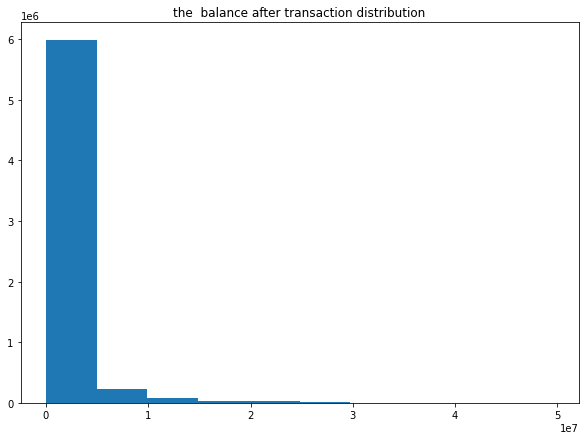

In [26]:
plt.figure(figsize = [10,7])
plt.hist(df.newbalanceOrig)
plt.title('the  balance after transaction distribution')
plt.show()

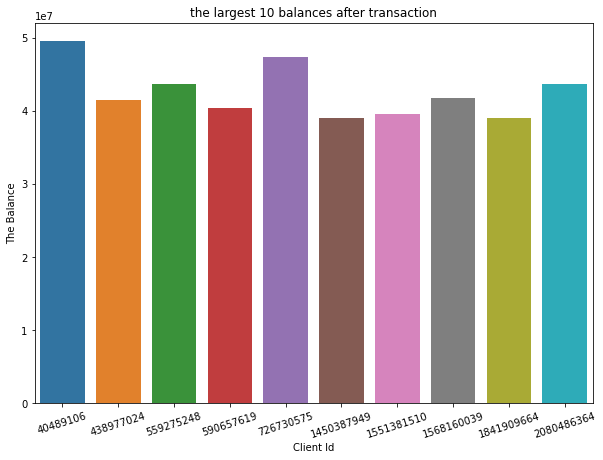

In [27]:
plt.figure(figsize = [10,7])
sns.barplot(x = df.nlargest(10, 'newbalanceOrig').client_id, y = df.nlargest(10, 'newbalanceOrig').newbalanceOrig)
plt.xticks(rotation = 17.5)
plt.title('the largest 10 balances after transaction')
plt.xlabel('Client Id')
plt.ylabel('The Balance')
plt.show()

In [28]:
# for the largest 10 clients we don't see any change in the balance between the before and after transaction 

Text(0, 0.5, 'the balance after transaction')

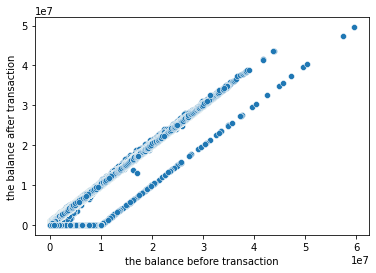

In [29]:
sns.scatterplot(x =df.oldbalanceOrg, y = df.newbalanceOrig)
plt.xlabel('the balance before transaction')
plt.ylabel('the balance after transaction')

In [30]:
# above figure shows an strong positive correlation between the balance between the balance before transaction and balance after transaction and that's mean The higher the account balance => the higher the transfer balance

In [31]:
df['nameDest'].value_counts()[:10]

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

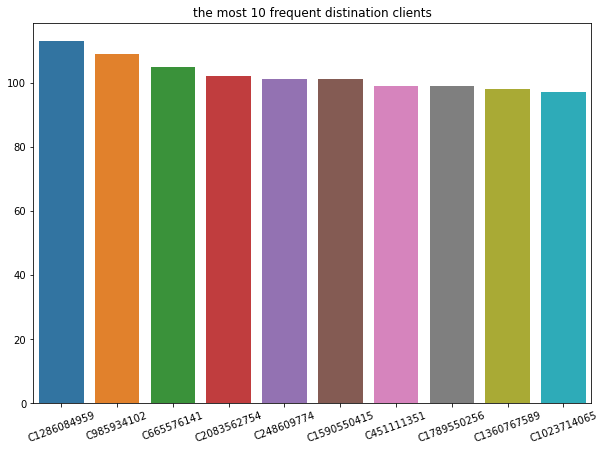

In [32]:
plt.figure(figsize = [10, 7])
sns.barplot(x=df['nameDest'].value_counts()[:10].index,y=df['nameDest'].value_counts()[:10].values)
plt.xticks(rotation = 20)
plt.title('the most 10 frequent distination clients')
plt.show()

In [33]:
# here we can say there's an fraud detection because some distination clients like the first one which has 113 transaction some thing may be wrong here 

In [34]:
# client id C1286084959 let's see the largest amount of money transfer and is fraud or not
df[df.nameDest=='C1286084959'].describe()

,step,amount,client_id,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,113.000000,1.130000e+02,1.130000e+02,1.130000e+02,1.130000e+02,1.130000e+02,1.130000e+02,113.0,113.0
mean,48.654867,6.852119e+05,1.009350e+09,1.528629e+06,1.578053e+06,1.302417e+07,1.429012e+07,0.0,0.0
std,100.229627,2.616135e+06,6.419677e+08,2.634386e+06,2.717605e+06,1.468275e+07,1.511047e+07,0.0,0.0
min,1.000000,2.373110e+03,1.311740e+07,0.000000e+00,0.000000e+00,6.677780e+05,1.378570e+06,0.0,0.0
25%,3.000000,1.196750e+05,4.644094e+08,0.000000e+00,0.000000e+00,2.539946e+06,2.107778e+06,0.0,0.0
50%,8.000000,2.467958e+05,9.869447e+08,2.812300e+04,0.000000e+00,1.101671e+07,1.295976e+07,0.0,0.0
75%,17.000000,4.250524e+05,1.638991e+09,2.395084e+06,2.562312e+06,1.773507e+07,1.877455e+07,0.0,0.0
max,401.000000,2.130032e+07,2.112648e+09,1.092285e+07,1.104356e+07,6.226261e+07,6.245186e+07,0.0,0.0


In [35]:
# no fraud detection inspite of 113 trasaction which is good sign

In [36]:
df[df.isFraud == 1]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [37]:
df[df.isFlaggedFraud == 1]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [38]:
df.nameDest = df.nameDest.replace('C','')
df.nameDest = df.nameDest.replace('M','')
df.rename(columns = {'nameDest' : 'distination_client_id'}, inplace = True)

In [39]:
df

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,distination_client_id,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [40]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

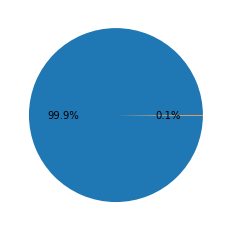

In [41]:
plt.pie(df.isFraud.value_counts(),autopct='%1.1f%%')
plt.show()

In [42]:
# fraud transaction is 0.1%

In [43]:
class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]

In [44]:
class_count_0, class_count_1 = df['isFraud'].value_counts()
class_0_under = class_0.sample(class_count_1)
balancing_data = pd.concat([class_0_under, class_1], axis=0)

<AxesSubplot:title={'center':'count (target)'}>

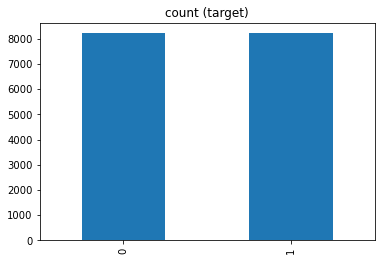

In [45]:
balancing_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [46]:
#dataset is now balanced

In [47]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 4948807 to 6362619
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   step                   16426 non-null  int64  
 1   type                   16426 non-null  object 
 2   amount                 16426 non-null  float64
 3   client_id              16426 non-null  int32  
 4   oldbalanceOrg          16426 non-null  float64
 5   newbalanceOrig         16426 non-null  float64
 6   distination_client_id  16426 non-null  object 
 7   oldbalanceDest         16426 non-null  float64
 8   newbalanceDest         16426 non-null  float64
 9   isFraud                16426 non-null  int64  
 10  isFlaggedFraud         16426 non-null  int64  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 1.4+ MB


In [48]:
balancing_data.type.unique()

array(['CASH_IN', 'CASH_OUT', 'PAYMENT', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [49]:
balancing_data["type"]=balancing_data["type"].map({"CASH_OUT":1,"CASH_IN":2,"PAYMENT":3,"TRANSFER":4,"DEBIT":5})

In [50]:
# model building
balancing_data
 

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,distination_client_id,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4948807,351,2,390502.57,1939493491,4057814.80,4448317.37,C510454667,9471213.84,9080711.27,0,0
3378717,254,2,223038.36,1592980243,8504546.18,8727584.54,C1192636169,1908828.94,1685790.58,0,0
2983486,231,1,92266.94,846827049,0.00,0.00,C2005238270,490052.68,582319.62,0,0
2562320,206,1,40788.47,1891024319,320629.00,279840.53,C1693949224,994276.69,1035065.15,0,0
4517542,325,3,6367.46,1753323324,28486.00,22118.54,M1952981006,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [51]:
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].values
y = balancing_data.loc[:,'isFraud'].values

In [52]:
balancing_data

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,distination_client_id,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4948807,351,2,390502.57,1939493491,4057814.80,4448317.37,C510454667,9471213.84,9080711.27,0,0
3378717,254,2,223038.36,1592980243,8504546.18,8727584.54,C1192636169,1908828.94,1685790.58,0,0
2983486,231,1,92266.94,846827049,0.00,0.00,C2005238270,490052.68,582319.62,0,0
2562320,206,1,40788.47,1891024319,320629.00,279840.53,C1693949224,994276.69,1035065.15,0,0
4517542,325,3,6367.46,1753323324,28486.00,22118.54,M1952981006,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [54]:
X_train.shape,X_test.shape

((13140, 4), (3286, 4))

In [55]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [56]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [58]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [59]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.8660578386605784
Testing Accuracy: 0.8724893487522825
Testing Confusion Matrix: 
[[1645   27]
 [ 392 1222]]
Recall Score :  0.8724893487522825
Precision Score :  0.8724893487522825
Testing F-1: 0.8724893487522825
Testing F-Beta: 0.8724893487522825
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9915525114155251
Testing Accuracy: 0.9917833231892879
Testing Confusion Matrix: 
[[1650   22]
 [   5 1609]]
Recall Score :  0.9917833231892879
Precision Score :  0.9917833231892879
Testing F-1: 0.9917833231892879
Testing F-Beta: 0.9917833231892879
------------------------------
Training Model DT 
--------------
Training Accuracy: 0.999923896499239
Testing Accuracy: 0.994826536822885
Testing Confusion Matrix: 
[[1660   12]
 [   5 1609]]
Recall Score :  0.994826536822885
Precision Score :  0.994826536822885
Testing F-1: 0.994826536822885
Testing F-Beta: 0.9948265368228849
------------------------------
Tr

In [60]:
# KNN is best model with accuracy 99% and F1 score 99% .
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)

KNeighborsClassifier()


In [61]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [62]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.18%


In [80]:
param = {'max_depth': [6,9, None], 
         'n_estimators':[50, 70, 100, 150], 
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          }

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, 
n_iter =10, cv=9)
rnd_search.fit(X,y)
rnd_search.best_params_
rnd_search.best_score_

0.9934865739420948

In [97]:
result={"model":["LR","KNN","DT","RF","Naive Bayes","SVC"],"Training Accuracy":[0.866,0.991,0.999,0.999,0.647,0.891],"Testing Accuracy":[0.872,0.991,0.994,0.995,0.652,0.904]}

In [99]:
df1=pd.DataFrame(result)
df1

,model,Training Accuracy,Testing Accuracy
0,LR,0.866,0.872
1,KNN,0.991,0.991
2,DT,0.999,0.994
3,RF,0.999,0.995
4,Naive Bayes,0.647,0.652
5,SVC,0.891,0.904
